In [1]:
# Import necessary packages.
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from collections import Counter
from nltk.corpus import stopwords

In [3]:
# Load the dataset as dataframe.
df = pd.read_csv("synthetic_names_samples.csv")
print(df['keywords'])

0       allergy / immunology, allergic rhinitis, aller...
1       bariatrics, laparoscopic gastric bypass, weigh...
2       bariatrics, laparoscopic gastric bypass, heart...
3       cardiovascular / pulmonary, 2-d m-mode, dopple...
4       cardiovascular / pulmonary, 2-d, doppler, echo...
                              ...                        
4961    adenoidectomy, adenopathy, hypertension, tonsi...
4962    allergy / immunology, mucous membranes, conjun...
4963    heartburn, diarrhea, menstrual, headaches, lym...
4964    pneumonia, hospitalist, antibiotic, asthma, vo...
4965    physicians, adenopathy, antibiotics, dialysis,...
Name: keywords, Length: 4966, dtype: object


In [7]:
# Split the keywords column into a column of list of keywords
df['keys'] = df['keywords'].str.split()

In [9]:
# Method that filters list of keywords by only keeping alphanumeric keywords.
def remove_fillers(keys) :
    newval = []
    for item in keys:
        if item and item.isalnum():
            newval.append(item)
    return newval

In [10]:
# Column of list of alphanumeric keywords
df['keys_1'] = df['keys'].apply(remove_fillers)

In [12]:
# Display the dataframe
df.head()

,index,description,medical_specialty,sample_name,transcription,keywords,keys,keys_1
0,0,A 23-year-old white female presents with comp...,Allergy / Immunology,Allergic Rhinitis,"NAME : Charlie Harlow SUBJECTIVE:, This 23-y...","allergy / immunology, allergic rhinitis, aller...","[allergy, /, immunology,, allergic, rhinitis,,...","[allergy, allergic, nasal]"
1,1,Consult for laparoscopic gastric bypass.,Bariatrics,Laparoscopic Gastric Bypass Consult - 2,"NAME : Helen Bradford PAST MEDICAL HISTORY:, ...","bariatrics, laparoscopic gastric bypass, weigh...","[bariatrics,, laparoscopic, gastric, bypass,, ...","[laparoscopic, gastric, weight, loss, gastric,..."
2,2,Consult for laparoscopic gastric bypass.,Bariatrics,Laparoscopic Gastric Bypass Consult - 1,NAME : Walter Welter HISTORY OF PRESENT ILLNE...,"bariatrics, laparoscopic gastric bypass, heart...","[bariatrics,, laparoscopic, gastric, bypass,, ...","[laparoscopic, gastric, heart, body, pulmonary..."
3,3,2-D M-Mode. Doppler.,Cardiovascular / Pulmonary,2-D Echocardiogram - 1,"NAME : Doris Emmert 2-D M-MODE: , ,1. Left a...","cardiovascular / pulmonary, 2-d m-mode, dopple...","[cardiovascular, /, pulmonary,, 2-d, m-mode,, ...","[cardiovascular, aortic, atrial, diastolic, ej..."
4,4,2-D Echocardiogram,Cardiovascular / Pulmonary,2-D Echocardiogram - 2,NAME : Rochelle Hurt 1. The left ventricular...,"cardiovascular / pulmonary, 2-d, doppler, echo...","[cardiovascular, /, pulmonary,, 2-d,, doppler,...","[cardiovascular, aortic, aortic, ejection, rel..."


In [13]:
# Collect and count all keywords, create a Dataframe of keywords frequencies sorted by count
all_keywords = [keyword for sublist in df['keys_1'] for keyword in sublist]
stop_words = set(stopwords.words('english'))
filtered_keywords = [keyword for keyword in all_keywords if keyword.lower() not in stop_words]
keyword_counts = Counter(all_keywords)

keyword_df = pd.DataFrame(keyword_counts.items(), columns=['Keyword', 'Count'])

keyword_df = keyword_df.sort_values(by='Count', ascending=False)


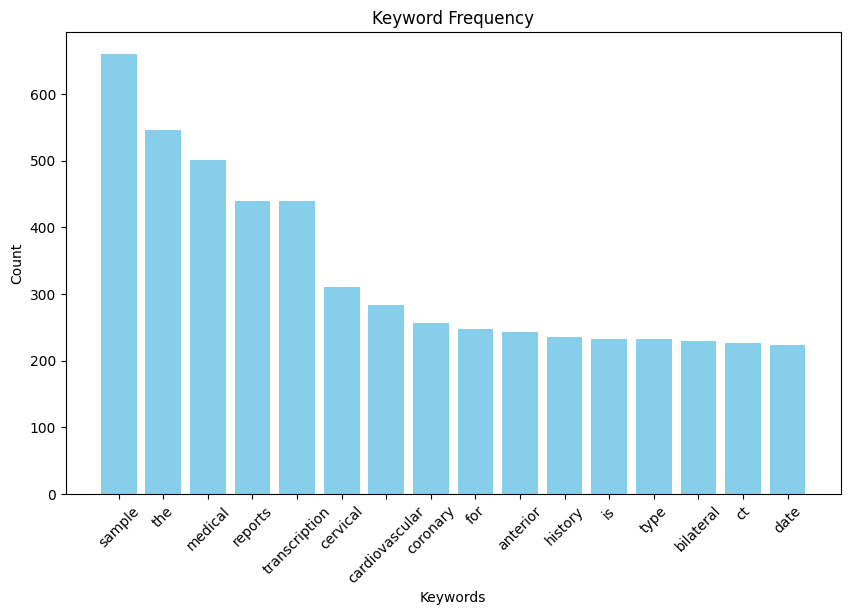

In [17]:
# Plot to visualize keyword frequency.
plt.figure(figsize=(10, 6))
plt.bar(keyword_df['Keyword'].iloc[4:20], keyword_df['Count'].iloc[4:20], color='skyblue')
plt.xlabel('Keywords')
plt.ylabel('Count')
plt.title('Keyword Frequency')
plt.xticks(rotation=45)
plt.show()

In [18]:
# Add a new column that counts the number of words in each transcription.
df['word_count'] = df['transcription'].apply(lambda x: len(x.split()))

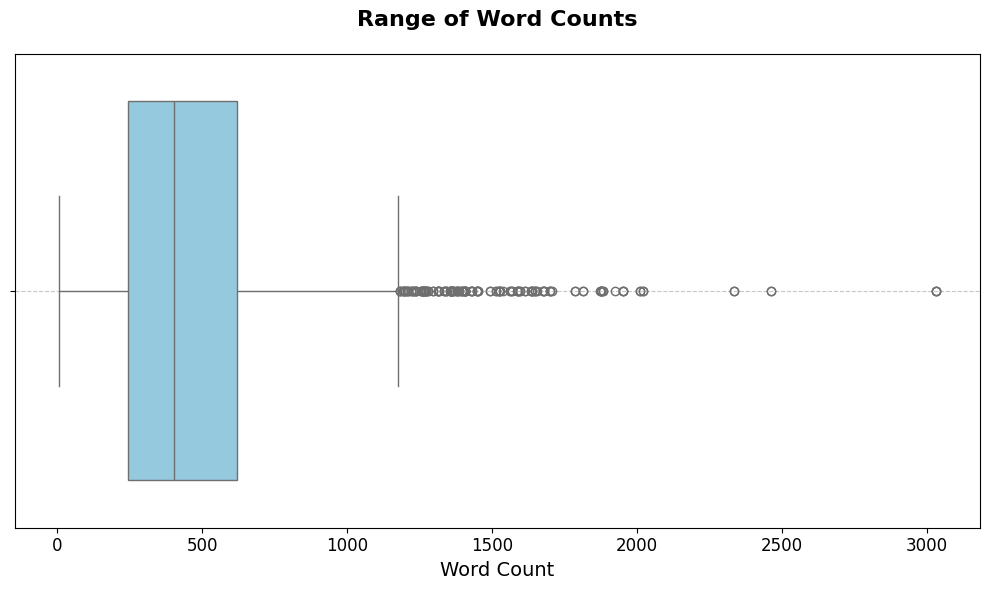

In [19]:
# Plot to visualize range of word counts.
plt.figure(figsize=(10, 6))

# Use Seaborn boxplot
sns.boxplot(x=df['word_count'], color='skyblue')

# Add labels and title
plt.title('Range of Word Counts', fontsize=16, fontweight='bold', pad=20)
plt.xlabel('Word Count', fontsize=14)
plt.xticks(fontsize=12)
plt.grid(axis='y', linestyle='--', alpha=0.7)

# Show plot
plt.tight_layout()
plt.show()